<a href="https://colab.research.google.com/github/Armin-Abdollahi/Bone-Age-Estimation/blob/main/Bone_Age_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regression task for bone age estimation

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
# Load the labels
labels_path = '/content/drive/MyDrive/Digital_Hand_Atlas_Dataset/Total_Images/Bordered_XRay_Images/Label.csv'
labels = pd.read_csv(labels_path)

In [ ]:
labels['Case ID'] = labels['Case ID'].apply(lambda x: str(x)+'.jpg')

labels.head()

,Case ID,Bone Age,Male,Location
0,1.jpg,0,False,Asian
1,2.jpg,0,False,Asian
2,3.jpg,0,False,Asian
3,4.jpg,0,False,Asian
4,5.jpg,0,False,Asian


In [ ]:
# Ensure the 'Case ID' column is of type string
labels['Case ID'] = labels['Case ID'].astype(str)

In [ ]:
# Create the image data generator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [ ]:
# Create the train and validation generators
train_generator = datagen.flow_from_dataframe(
    dataframe=labels,
    directory='/content/drive/MyDrive/Digital_Hand_Atlas_Dataset/Total_Images/Bordered_XRay_Images',
    x_col='Case ID',
    y_col='Bone Age',
    target_size=(256, 256),
    color_mode='grayscale',
    class_mode='raw',
    batch_size=32,
    subset='training'
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=labels,
    directory='/content/drive/MyDrive/Digital_Hand_Atlas_Dataset/Total_Images/Bordered_XRay_Images',
    x_col='Case ID',
    y_col='Bone Age',
    target_size=(256, 256),
    color_mode='grayscale',
    class_mode='raw',
    batch_size=32,
    subset='validation'
)

Found 5915 validated image filenames.
Found 1478 validated image filenames.


In [ ]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='linear')  # Linear activation for regression
])

In [ ]:
# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32,
    epochs=10
)

Epoch 1/10
184/184 [==============================] - 2186s 12s/step - loss: 13.7862 - mae: 2.5479 - val_loss: 4.7875 - val_mae: 1.7127
Epoch 2/10
184/184 [==============================] - 323s 2s/step - loss: 5.3079 - mae: 1.7565 - val_loss: 3.9419 - val_mae: 1.5397
Epoch 3/10
184/184 [==============================] - 338s 2s/step - loss: 4.8130 - mae: 1.6668 - val_loss: 4.0213 - val_mae: 1.6230
Epoch 4/10
184/184 [==============================] - 313s 2s/step - loss: 4.0725 - mae: 1.5189 - val_loss: 4.2755 - val_mae: 1.6267
Epoch 5/10
184/184 [==============================] - 343s 2s/step - loss: 3.8990 - mae: 1.4805 - val_loss: 5.7070 - val_mae: 1.7483
Epoch 6/10
184/184 [==============================] - 318s 2s/step - loss: 3.3582 - mae: 1.3772 - val_loss: 3.4978 - val_mae: 1.4331
Epoch 7/10
184/184 [==============================] - 356s 2s/step - loss: 3.1712 - mae: 1.3231 - val_loss: 3.6373 - val_mae: 1.4481
Epoch 8/10
184/184 [==============================] - 284s 2s/step

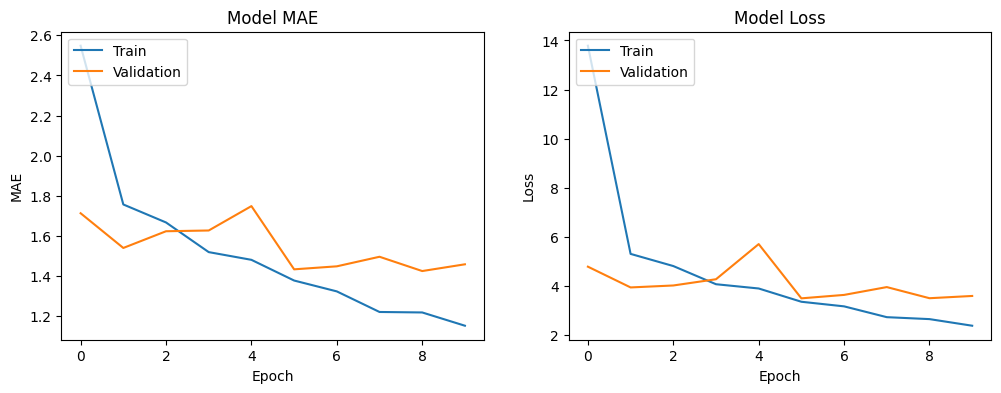

In [ ]:
# Plot training & validation MAE values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
# Save the model
model.save('/content/drive/MyDrive/bone_age_cnn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Classification task for bone age estimation

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Load the labels
labels_path = '/content/drive/MyDrive/Digital_Hand_Atlas_Dataset/Total_Images/Bordered_XRay_Images/Classification_Task_Labels.csv'
labels = pd.read_csv(labels_path)

In [ ]:
labels['Case ID'] = labels['Case ID'].apply(lambda x: str(x)+'.jpg')

labels.head()

,Case ID,Bone Age,Male,Location,Group
0,1.jpg,0,False,Asian,A
1,2.jpg,0,False,Asian,A
2,3.jpg,0,False,Asian,A
3,4.jpg,0,False,Asian,A
4,5.jpg,0,False,Asian,A


In [ ]:
# Map bone age to age groups (Group A, B, C)
def map_to_age_group(bone_age):
    if bone_age <= 5:
        return 'Group A'
    elif 6 <= bone_age <= 12:
        return 'Group B'
    else:
        return 'Group C'

labels['Age Group'] = labels['Bone Age'].apply(map_to_age_group)

In [ ]:
# Ensure the 'Case ID' column is of type string
labels['Case ID'] = labels['Case ID'].astype(str)

In [ ]:
# Create the image data generator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [ ]:
# Create the train and validation generators
train_generator = datagen.flow_from_dataframe(
    dataframe=labels,
    directory='/content/drive/MyDrive/Digital_Hand_Atlas_Dataset/Total_Images/Bordered_XRay_Images',
    x_col='Case ID',
    y_col='Age Group',  # Use the new 'Age Group' column
    target_size=(256, 256),
    color_mode='grayscale',
    class_mode='categorical',  # Use categorical mode for classification
    batch_size=32,
    subset='training'
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=labels,
    directory='/content/drive/MyDrive/Digital_Hand_Atlas_Dataset/Total_Images/Bordered_XRay_Images',
    x_col='Case ID',
    y_col='Age Group',
    target_size=(256, 256),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=32,
    subset='validation'
)

Found 5915 validated image filenames belonging to 3 classes.
Found 1478 validated image filenames belonging to 3 classes.


In [ ]:
# Build the modified CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # Three output neurons for age groups
])

In [ ]:
# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32,
    epochs=5
)

Epoch 1/5
184/184 [==============================] - 2377s 13s/step - loss: 0.5630 - accuracy: 0.7828 - val_loss: 0.4819 - val_accuracy: 0.8166
Epoch 2/5
184/184 [==============================] - 340s 2s/step - loss: 0.3732 - accuracy: 0.8421 - val_loss: 0.4070 - val_accuracy: 0.8077
Epoch 3/5
184/184 [==============================] - 295s 2s/step - loss: 0.3004 - accuracy: 0.8689 - val_loss: 0.4508 - val_accuracy: 0.8064
Epoch 4/5
184/184 [==============================] - 353s 2s/step - loss: 0.2502 - accuracy: 0.8994 - val_loss: 0.4496 - val_accuracy: 0.8071
Epoch 5/5
184/184 [==============================] - 300s 2s/step - loss: 0.1956 - accuracy: 0.9228 - val_loss: 0.4824 - val_accuracy: 0.8077


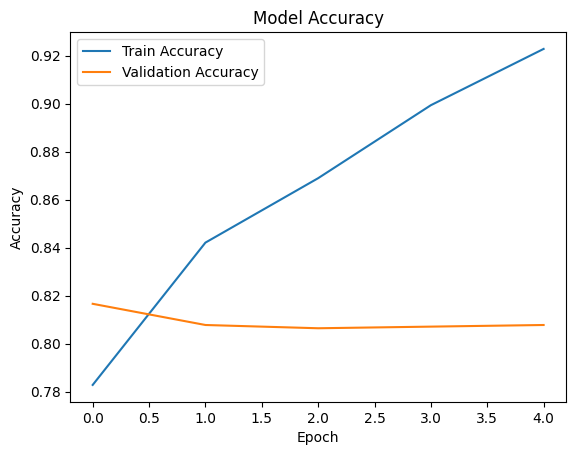

In [ ]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Save the model
model.save('/content/drive/MyDrive/bone_age_classification_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Confusion Matrix

In [ ]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Load the labels
labels_path = '/content/drive/MyDrive/Digital_Hand_Atlas_Dataset/Total_Images/Bordered_XRay_Images/Classification_Task_Labels.csv'
labels = pd.read_csv(labels_path)

In [ ]:
# Map bone age to age groups (Group A, B, C)
def map_to_age_group(bone_age):
    if bone_age <= 5:
        return 'Group A'
    elif 6 <= bone_age <= 12:
        return 'Group B'
    else:
        return 'Group C'

labels['Age Group'] = labels['Bone Age'].apply(map_to_age_group)

In [ ]:
# Encode age groups
le = LabelEncoder()
labels['Age Group Encoded'] = le.fit_transform(labels['Age Group'])

In [ ]:
# Split data into train and validation sets
train_size = int(0.8 * len(labels))
train_data = labels.iloc[:train_size]
validation_data = labels.iloc[train_size:]

In [ ]:
# Create features (X) and target labels (y)
X_train = train_data['Case ID']
y_train = train_data['Age Group Encoded']
X_val = validation_data['Case ID']
y_val = validation_data['Age Group Encoded']

In [ ]:
# Initialize and train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train.to_frame(), y_train)

MultinomialNB()

In [ ]:
# Predictions on validation set
y_pred = nb_classifier.predict(X_val.to_frame())

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[  0 299   0]
 [  0 634   0]
 [  0 546   0]]


In [ ]:
# Classification report
class_report = classification_report(y_val, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       299
           1       0.43      1.00      0.60       634
           2       0.00      0.00      0.00       546

    accuracy                           0.43      1479
   macro avg       0.14      0.33      0.20      1479
weighted avg       0.18      0.43      0.26      1479



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## U-Net

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, UpSampling2D, concatenate

In [ ]:
# Define U-Net architecture
def unet_model(input_shape):
    inputs = Input(shape=input_shape)

    # Encoder
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    # Bottleneck
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)

    # Decoder
    up1 = UpSampling2D(size=(2, 2))(conv2)
    merge1 = concatenate([conv1, up1], axis=-1)
    conv3 = Conv2D(32, (3, 3), activation='relu', padding='same')(merge1)
    conv3 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv3)

    # Output layer
    output = Conv2D(1, (1, 1), activation='linear')(conv3)

    model = Model(inputs=inputs, outputs=output)
    return model

In [ ]:
# Create the U-Net model
input_shape = (256, 256, 1)  # Adjust input shape based on your data
model = unet_model(input_shape)

In [ ]:
# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])

In [ ]:
# Print model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 32)         320       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 32)         9248      ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)         0         ['conv2d_1[0][0]']            
 D)                                                                                           

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32,
    epochs=10
)

Epoch 1/10
184/184 [==============================] - 2058s 11s/step - loss: 37.4775 - mae: 5.1808 - val_loss: 28.7959 - val_mae: 4.5437
Epoch 2/10
184/184 [==============================] - 367s 2s/step - loss: 32.6612 - mae: 4.9248 - val_loss: 28.9686 - val_mae: 4.5651
Epoch 3/10
184/184 [==============================] - 328s 2s/step - loss: 31.7877 - mae: 4.8789 - val_loss: 30.0937 - val_mae: 4.6696
Epoch 4/10
184/184 [==============================] - 344s 2s/step - loss: 31.3163 - mae: 4.8431 - val_loss: 32.6159 - val_mae: 4.8693
Epoch 5/10
184/184 [==============================] - 367s 2s/step - loss: 31.3557 - mae: 4.8471 - val_loss: 28.3512 - val_mae: 4.5044
Epoch 6/10
184/184 [==============================] - 347s 2s/step - loss: 31.1599 - mae: 4.8425 - val_loss: 27.2965 - val_mae: 4.4178
Epoch 7/10
184/184 [==============================] - 330s 2s/step - loss: 31.2267 - mae: 4.8438 - val_loss: 27.7019 - val_mae: 4.4483
Epoch 8/10
184/184 [==============================] -

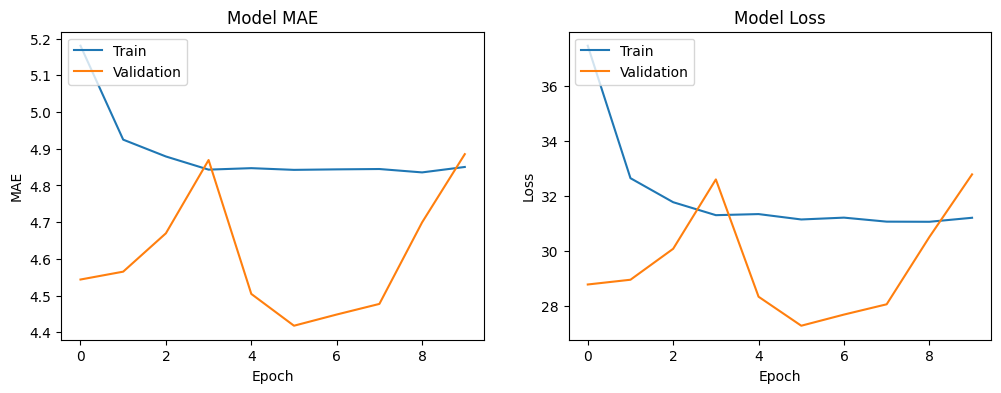

In [ ]:
# Plot training & validation MAE values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

VGG19

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
# Load the labels
labels_path = '/content/drive/MyDrive/Digital_Hand_Atlas_Dataset/Total_Images/Bordered_XRay_Images/Label.csv'
labels = pd.read_csv(labels_path)

In [ ]:
labels['Case ID'] = labels['Case ID'].apply(lambda x: str(x)+'.jpg')

labels.head()

,Case ID,Bone Age,Male,Location
0,1.jpg,0,False,Asian
1,2.jpg,0,False,Asian
2,3.jpg,0,False,Asian
3,4.jpg,0,False,Asian
4,5.jpg,0,False,Asian


In [ ]:
# Ensure the 'Case ID' column is of type string
labels['Case ID'] = labels['Case ID'].astype(str)

In [ ]:
# Create the image data generator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [ ]:
# Create the train and validation generators
train_generator = datagen.flow_from_dataframe(
    dataframe=labels,
    directory='/content/drive/MyDrive/Digital_Hand_Atlas_Dataset/Total_Images/Bordered_XRay_Images',
    x_col='Case ID',
    y_col='Bone Age',
    target_size=(256, 256),
    color_mode='rgb',  # Change to 'rgb' for 3 channels
    class_mode='raw',
    batch_size=32,
    subset='training'
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=labels,
    directory='/content/drive/MyDrive/Digital_Hand_Atlas_Dataset/Total_Images/Bordered_XRay_Images',
    x_col='Case ID',
    y_col='Bone Age',
    target_size=(256, 256),
    color_mode='rgb',  # Change to 'rgb' for 3 channels
    class_mode='raw',
    batch_size=32,
    subset='validation'
)

Found 5915 validated image filenames.
Found 1478 validated image filenames.


In [ ]:
# Build the VGG19 model
base_model = VGG19(include_top=False, input_shape=(256, 256, 3))  # Adjust input shape
model = tf.keras.Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='linear')  # Linear activation for regression
])

80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32,
    epochs=10
)

Epoch 1/10
184/184 [==============================] - 2501s 13s/step - loss: 2846.7888 - mae: 10.2710 - val_loss: 33.1819 - val_mae: 4.9153
Epoch 2/10
184/184 [==============================] - 311s 2s/step - loss: 24.9609 - mae: 4.0595 - val_loss: 8.3976 - val_mae: 2.2696
Epoch 3/10
184/184 [==============================] - 312s 2s/step - loss: 10.1369 - mae: 2.4070 - val_loss: 5.3817 - val_mae: 1.7857
Epoch 4/10
184/184 [==============================] - 269s 1s/step - loss: 8.1635 - mae: 2.1656 - val_loss: 5.6285 - val_mae: 1.9480
Epoch 5/10
184/184 [==============================] - 304s 2s/step - loss: 7.4869 - mae: 2.0699 - val_loss: 4.4357 - val_mae: 1.5858
Epoch 6/10
184/184 [==============================] - 274s 1s/step - loss: 7.2642 - mae: 2.0532 - val_loss: 4.9116 - val_mae: 1.7435
Epoch 7/10
184/184 [==============================] - 292s 2s/step - loss: 7.0187 - mae: 2.0002 - val_loss: 4.4709 - val_mae: 1.5742
Epoch 8/10
184/184 [==============================] - 300s 2

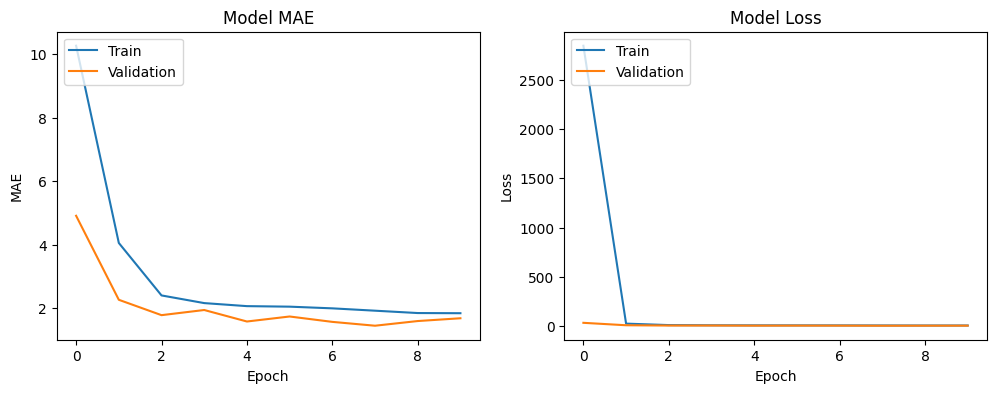

In [ ]:
# Plot training & validation MAE values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

YOLO algorithm for hand detection in X-ray images and add an attention mechanism

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Reshape, Multiply
from tensorflow.keras.models import Model

In [ ]:
# Load the labels
labels_path = '/content/drive/MyDrive/Digital_Hand_Atlas_Dataset/Total_Images/Bordered_XRay_Images/Label.csv'
labels = pd.read_csv(labels_path)

In [ ]:
labels['Case ID'] = labels['Case ID'].apply(lambda x: str(x)+'.jpg')

labels.head()

,Case ID,Bone Age,Male,Location
0,1.jpg,0,False,Asian
1,2.jpg,0,False,Asian
2,3.jpg,0,False,Asian
3,4.jpg,0,False,Asian
4,5.jpg,0,False,Asian


In [ ]:
# Ensure the 'Case ID' column is of type string
labels['Case ID'] = labels['Case ID'].astype(str)

In [ ]:
# Create the image data generator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [ ]:
# Create the train and validation generators
train_generator = datagen.flow_from_dataframe(
    dataframe=labels,
    directory='/content/drive/MyDrive/Digital_Hand_Atlas_Dataset/Total_Images/Bordered_XRay_Images',
    x_col='Case ID',
    y_col='Bone Age',
    target_size=(256, 256),
    color_mode='rgb',  # Change to 'rgb' for 3 channels
    class_mode='raw',
    batch_size=32,
    subset='training'
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=labels,
    directory='/content/drive/MyDrive/Digital_Hand_Atlas_Dataset/Total_Images/Bordered_XRay_Images',
    x_col='Case ID',
    y_col='Bone Age',
    target_size=(256, 256),
    color_mode='rgb',  # Change to 'rgb' for 3 channels
    class_mode='raw',
    batch_size=32,
    subset='validation'
)

Found 5915 validated image filenames.
Found 1478 validated image filenames.


In [ ]:
# Define the YOLO model architecture for grayscale images
def create_yolo_model(input_shape):
    inputs = Input(input_shape)

    # Your existing CNN layers adapted for single-channel input
    x = Conv2D(32, (3,3), activation='relu')(inputs)
    x = MaxPooling2D(2, 2)(x)
    x = Conv2D(64, (3,3), activation='relu')(x)
    x = MaxPooling2D(2,2)(x)
    x = Conv2D(128, (3,3), activation='relu')(x)
    x = MaxPooling2D(2,2)(x)

    # Flatten and apply dropout
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)

    # Output layer for YOLO, reshaped to grid size
    # Assuming 3x3 grid, 2 bounding boxes per grid cell, and 1 class (hand)
    output = Dense(3 * 3 * 2 * (4 + 1))(x)  # 4 coordinates + 1 class confidence
    output = Reshape((3, 3, 2, 5))(output)

    return Model(inputs, output)

In [ ]:
# Create the YOLO model for grayscale images
yolo_model = create_yolo_model((256, 256, 1))

In [ ]:
# Define the attention mechanism
def attention_mechanism(feature_map):
    # Apply attention to the feature map
    attention_map = Conv2D(1, (1, 1), activation='sigmoid')(feature_map)
    attended_features = Multiply()([feature_map, attention_map])
    return attended_features

In [ ]:
# Add the attention mechanism to the model
inputs = Input((256, 256, 1))
features = yolo_model(inputs)
attended_features = attention_mechanism(features)

In [ ]:
# Final model with attention
final_model = Model(inputs, attended_features)

In [ ]:
# Compile the model
final_model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])

In [ ]:
# Train the model
history = final_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32,
    epochs=10
)

Epoch 1/10


InternalError: Graph execution error:

Detected at node model_1/model/conv2d/Relu defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-24-770c6135b902>", line 2, in <cell line: 2>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 590, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 515, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 590, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 515, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py", line 321, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/activations.py", line 306, in relu

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5395, in relu

Cudnn graph failed to build: UNKNOWN: CUDNN_STATUS_BAD_PARAM
in external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc(4837): 'conv_op' CUDNN_BACKEND_OPERATION: cudnnFinalize Failed
	 [[{{node model_1/model/conv2d/Relu}}]] [Op:__inference_train_function_15596]

In [ ]:
# Plot training & validation MAE values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

Vision Transformer (ViT)

In [2]:
!pip install tensorflow-addons==0.16.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.3 MB/s eta 0:00:00


In [3]:
import tensorflow_addons as tfa

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.6.0 and strictly below 2.9.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.15.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [4]:
!pip install vit-keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.9 MB/s eta 0:00:00


In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from vit_keras import vit

In [6]:
# Load the labels
labels_path = '/content/drive/MyDrive/Digital_Hand_Atlas_Dataset/Total_Images/Bordered_XRay_Images/Label.csv'
labels = pd.read_csv(labels_path)

In [7]:
labels['Case ID'] = labels['Case ID'].apply(lambda x: str(x)+'.jpg')

labels.head()

,Case ID,Bone Age,Male,Location
0,1.jpg,0,False,Asian
1,2.jpg,0,False,Asian
2,3.jpg,0,False,Asian
3,4.jpg,0,False,Asian
4,5.jpg,0,False,Asian


In [8]:
# Ensure the 'Case ID' column is of type string
labels['Case ID'] = labels['Case ID'].astype(str)

In [9]:
# Create the image data generator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [10]:
# Create the train and validation generators
train_generator = datagen.flow_from_dataframe(
    dataframe=labels,
    directory='/content/drive/MyDrive/Digital_Hand_Atlas_Dataset/Total_Images/Bordered_XRay_Images',
    x_col='Case ID',
    y_col='Bone Age',
    target_size=(256, 256),
    color_mode='grayscale',
    class_mode='raw',
    batch_size=32,
    subset='training'
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=labels,
    directory='/content/drive/MyDrive/Digital_Hand_Atlas_Dataset/Total_Images/Bordered_XRay_Images',
    x_col='Case ID',
    y_col='Bone Age',
    target_size=(256, 256),
    color_mode='grayscale',
    class_mode='raw',
    batch_size=32,
    subset='validation'
)

Found 5915 validated image filenames.
Found 1478 validated image filenames.


In [11]:
# Load a pre-trained Vision Transformer model
vit_model = vit.vit_b16(
    image_size = (256, 256),
    activation = 'softmax',
    pretrained = True,
    include_top = False,
    pretrained_top = False,
    classes=2
)

347502902/347502902 [==============================] - 2s 0us/step


/usr/local/lib/python3.10/dist-packages/vit_keras/utils.py:81: UserWarning: Resizing position embeddings from 24, 24 to 16, 16
  warnings.warn(


In [12]:
# Add custom layers on top of the ViT model
input = tf.keras.Input(shape=(256,256,1))

In [13]:
# Replace grayscale to 3 channels
x = tf.keras.layers.Concatenate()([input, input, input])

x = vit_model(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='linear')(x) # Linear activation for regression

In [14]:
model = Model(inputs=input, outputs=output)

In [15]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mean_squared_error', metrics=['mae'])

In [16]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32,
    epochs=10
)

Epoch 1/10
184/184 [==============================] - 2139s 11s/step - loss: 23.4124 - mae: 3.9296 - val_loss: 8.2215 - val_mae: 2.2186
Epoch 2/10
184/184 [==============================] - 423s 2s/step - loss: 8.2910 - mae: 2.1951 - val_loss: 7.3319 - val_mae: 2.1962
Epoch 3/10
184/184 [==============================] - 433s 2s/step - loss: 8.0232 - mae: 2.1726 - val_loss: 5.3919 - val_mae: 1.7696
Epoch 4/10
184/184 [==============================] - 441s 2s/step - loss: 7.0465 - mae: 2.0240 - val_loss: 6.0514 - val_mae: 2.0038
Epoch 5/10
184/184 [==============================] - 396s 2s/step - loss: 7.4913 - mae: 2.0890 - val_loss: 5.9986 - val_mae: 1.9571
Epoch 6/10
184/184 [==============================] - 479s 3s/step - loss: 6.6247 - mae: 1.9589 - val_loss: 8.3393 - val_mae: 2.0752
Epoch 7/10
184/184 [==============================] - 420s 2s/step - loss: 6.4458 - mae: 1.9395 - val_loss: 5.0558 - val_mae: 1.6783
Epoch 8/10
184/184 [==============================] - 415s 2s/step

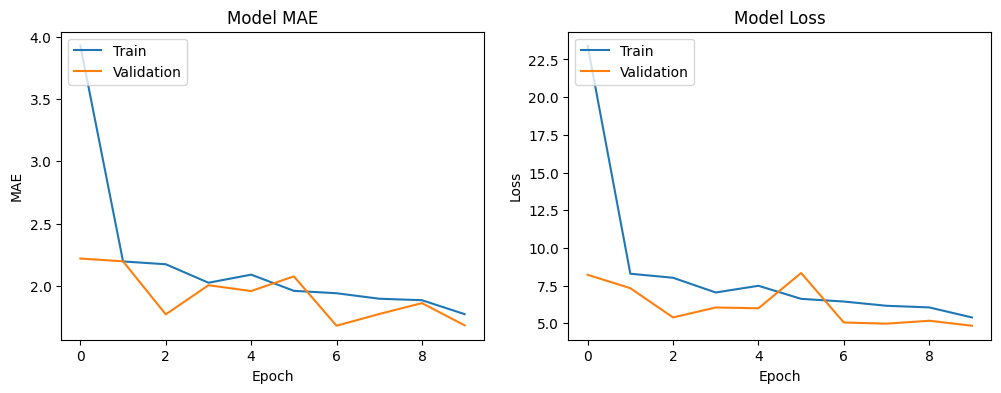

In [17]:
# Plot training & validation MAE values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()